## Laboration 1: Medical Prediction

In [87]:
import kagglehub
import pandas as pd

#Ladda ner senaste versionen av datasetet
path = kagglehub.dataset_download("sulianova/cardiovascular-disease-dataset")

#Läs in datasetet
df = pd.read_csv(f'{path}/cardio_train.csv', sep=';')

#Visa de första raderna för att kontrollera att det lästs in korrekt
df.head()


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [88]:
# Printar för att se antal rader i datasättet innan rensning

print(len(df))

70000


#### Rensa data på negativa blodtryck och blodtryck som är omöjligt höga.

In [89]:
df = df[(df['ap_hi'] > 0) & 
        (df['ap_lo'] > 0) & 
        (df['ap_hi'] <= 300) & 
        (df['ap_lo'] <= 300)]

# Visa antalet rader efter rensning
print(f"Antal rader efter rensning: {len(df)}")

# Visa statistik för blodtryckskolumnerna
print("\nStatistik för blodtryckskolumnerna:")
print(df[['ap_hi', 'ap_lo']].describe())

Antal rader efter rensning: 68985

Statistik för blodtryckskolumnerna:
              ap_hi         ap_lo
count  68985.000000  68985.000000
mean     126.325027     81.350482
std       17.698621      9.805666
min        7.000000      1.000000
25%      120.000000     80.000000
50%      120.000000     80.000000
75%      140.000000     90.000000
max      240.000000    190.000000


#### Exploraty Data Analysis (EDA) - För hjärt- och kärlsjukdomar

**Följande frågor för datasetet:**
- Hur många är positiva för hjärt-kärlsjukdom och hur många är negativa?
- Hur stor andel har normala, över normala och långt över normala kolesterolvärden? 
- Hur ser åldersfördelningen ut? 
- Hur stor andel röker?
- Hur ser viktfördelningen ut? 
- Hur ser längdfördelningen ut? 
- Hur stor andel av kvinnor respektive män har hjärt-kärlsjukdom? 

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

# Räkna antalet positiva och negativa fall för hjärt- och kärlsjukdomar
positive_cases = df[df['cardio'] == 1].shape[0]
negative_cases = df[df['cardio'] == 0].shape[0]

# Visa resultat
print(f"Antal personer som har hjärt-kärlsjukdom: {positive_cases}")
print(f"Antal personer som inte har hjärt-kärlsjukdom: {negative_cases}")


Antal personer som har hjärt-kärlsjukdom: 34141
Antal personer som inte har hjärt-kärlsjukdom: 34844


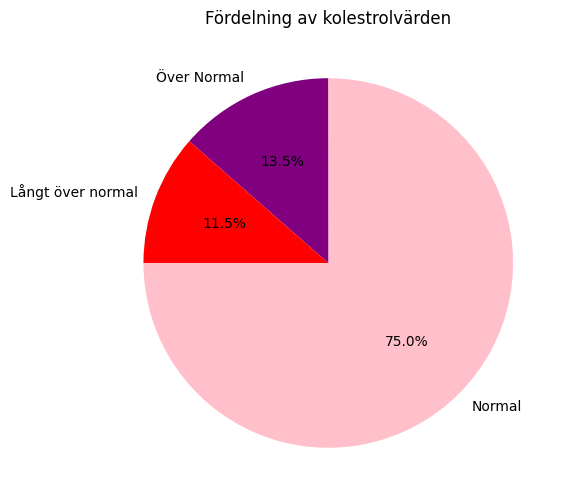

In [91]:
# Räkna antal i varje kategori
cholestrol_counts = df['cholesterol'].value_counts()

# Skapa Pie-chart
plt.figure(figsize=(8, 6))
plt.pie(cholestrol_counts, labels=["Normal", "Över Normal", "Långt över normal"], colors=["pink", "purple", "red"], autopct="%1.1f%%", startangle=180)
plt.title("Fördelning av kolestrolvärden")
plt.show()

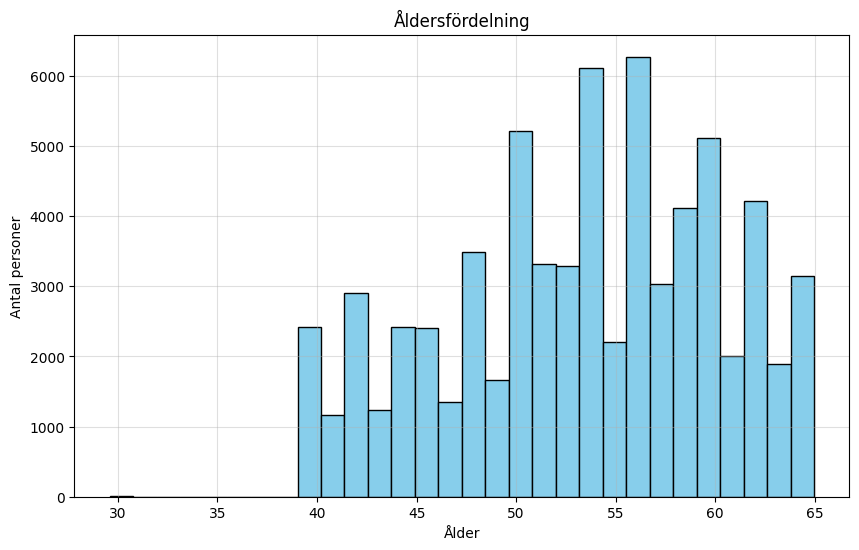

In [92]:
# Skapar ett histogram för att se hur åldersfördelningen ser ut
plt.figure(figsize=(10, 6))
plt.hist(df["age"]/365, bins=30, color="skyblue", edgecolor="black")
plt.title("Åldersfördelning")
plt.xlabel("Ålder")
plt.ylabel("Antal personer")
plt.grid(True, alpha=0.4)
plt.show()

In [93]:
# Beräkna andelen som röker
smokers = df['smoke'].mean() * 100

# Visa resultat
print(f"Andel rökare: {smokers:.2f} %")

Andel rökare: 8.79 %


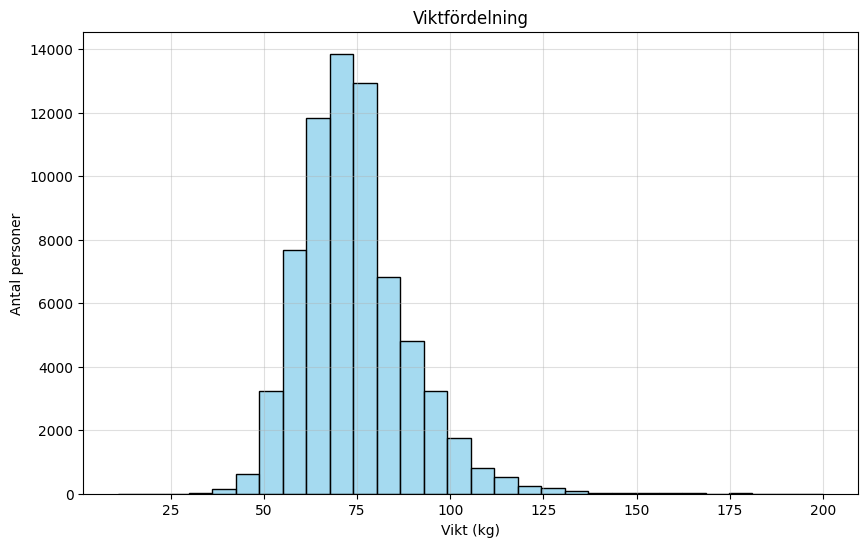

In [94]:
# Skapar ett histogram för att se hur viktfördelningen ser ut
plt.figure(figsize=(10, 6))
sns.histplot(df["weight"], bins=30, color="skyblue", edgecolor="black")
plt.title("Viktfördelning")
plt.xlabel("Vikt (kg)")
plt.ylabel("Antal personer")
plt.grid(True, alpha=0.4)
plt.show()

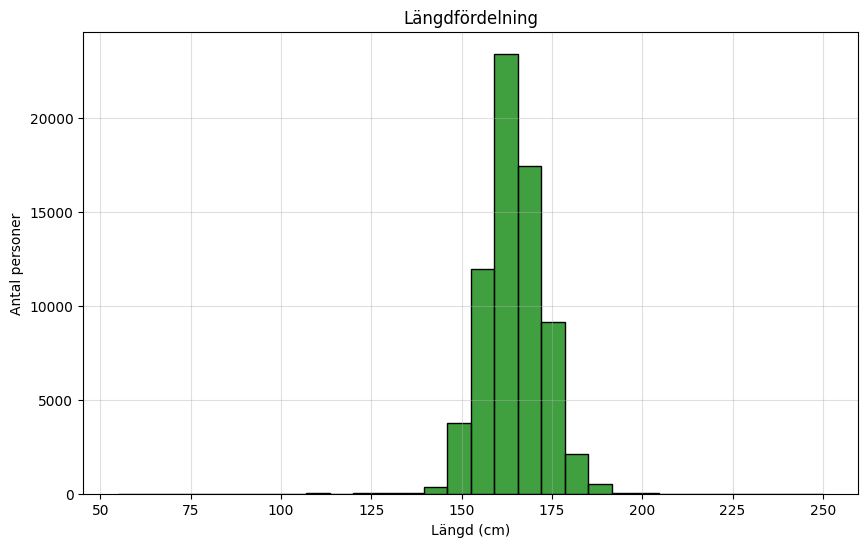

In [95]:
# Skapar ett histogram för att se längdfördelning
plt.figure(figsize=(10, 6))
sns.histplot(df["height"], bins=30, color="green", edgecolor="black")
plt.title("Längdfördelning")
plt.xlabel("Längd (cm)")
plt.ylabel("Antal personer")
plt.grid(True, alpha=0.4)
plt.show()

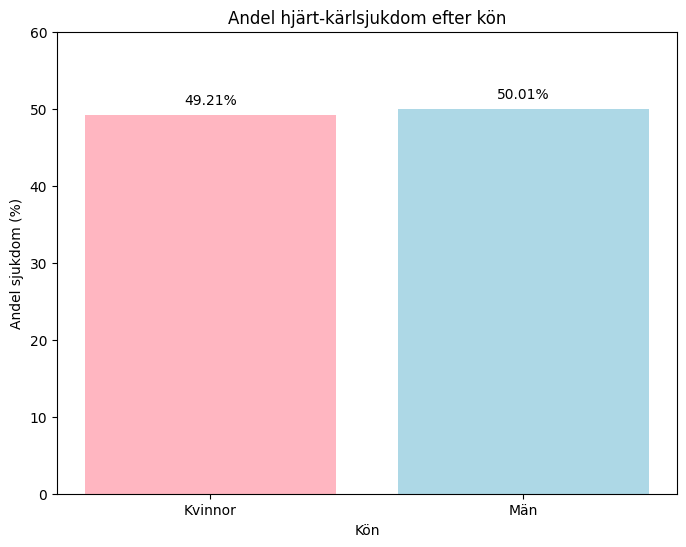

In [96]:
# Beräkna hur stor andel av kvinnor respektive män har hjärt- och kärlsjukdomar

# Gruppera data efter kön och sjukdomsstatus
gender_disease = df.groupby('gender')['cardio'].mean() * 100

# Skapa stapeldiagram
plt.figure(figsize=(8, 6))
bars = plt.bar(['Kvinnor', 'Män'], gender_disease.values, color=['lightpink', 'lightblue'])

# Lägg till procentvärden ovanför varje bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, 
             bar.get_height() + 1, 
             f'{bar.get_height():.2f}%', 
             ha='center', va='bottom')

plt.title('Andel hjärt-kärlsjukdom efter kön')
plt.xlabel('Kön')
plt.ylabel('Andel sjukdom (%)')
plt.ylim(0, 60)
plt.show()